In [1]:
#importing all the necessary libraries
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
#n_d -- noisy_data -- instance for reading file  
n_d = pd.read_csv('C:/Users/Raj Patel/Documents/college/ml programming/noisy_data.csv')

In [4]:
n_d # showing all the data of csv file

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [8]:
# As we can see by just reading the dataset, but here i have used the isnull() method to check for the missing dataset.
# isnull method will return the bolean value for the dataset, if missing value then true - if not then false.
# by adding the .sum it will return in the integer form
n_d.isnull().sum()

Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64

In [12]:
# standard deviation of Income column
import numpy
std = numpy.std(n_d.Income)
print(std)

13876.919286674867



### Imputation 


In [14]:
from sklearn.impute import SimpleImputer 

In [19]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean") #calling the imputer function 
                                                                # strategy mean because we want to replace null value by mean 

imputer.fit(n_d.iloc[:, 1:3]) # picking the Age and Income column

n_d.iloc[:, 1:3] = imputer.transform(n_d.iloc[:, 1:3]) 

In [20]:
n_d

,Region,Age,Income,Online Shopper
0,India,49.000000,86400.000000,No
1,Brazil,32.000000,57600.000000,Yes
2,USA,35.000000,64800.000000,No
3,Brazil,43.000000,73200.000000,No
4,USA,45.000000,76533.333333,Yes
5,India,40.000000,69600.000000,Yes
6,Brazil,43.777778,62400.000000,No
7,India,53.000000,94800.000000,Yes
8,USA,55.000000,99600.000000,No
9,India,42.000000,80400.000000,Yes


In [21]:
# as we can see the output the missing value has benn delt with by use of umputation method.
# both missing value is replaced by their respective mean.

In [22]:
n_d.describe() # describe function gives the statistical insight of data.
               # as we can see it gives the mean, standard deviation as well as min and max of numeric data.

,Age,Income
count,10.000000,10.000000
mean,43.777778,76533.333333
std,7.253777,13876.919287
min,32.000000,57600.000000
25%,40.500000,66000.000000
50%,43.388889,74866.666667
75%,48.000000,84900.000000
max,55.000000,99600.000000


### Normality Distribution

In [23]:
 # if we want to know about that how well our data is distributed then we can use the Normality Distribution.
 # normality distribution is also known as "gaussian distribution".
 # for checking the normality distribution there are two ways 
 #   1) Graphical distribution(not the most accurate)
 #   2) statistical approach 

 #### Hypothesis 
 There are two types of hypothesis 
 1: alternative hypothesis 
 2: null hypothesis 
 
 for given example 
 
 Null hypothesis : Our data is normally distributed
 

<AxesSubplot:>

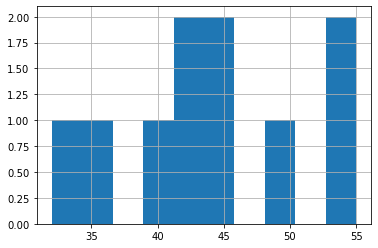

In [24]:
 n_d.Age.hist()

<AxesSubplot:>

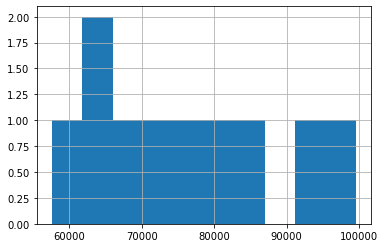

In [25]:
n_d.Income.hist()

 #### Here it is visible that histogram of data would not fit the bell curve, so given data is not normally distributed. 

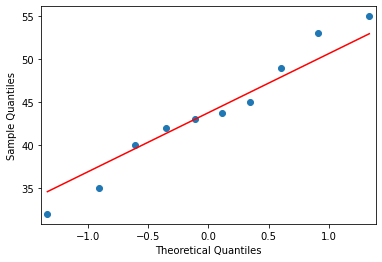

In [26]:
 # here i have used q-q or quantile-quantile plot for checking the normality distribution
# q-q method gives the better understanding of our data compare to simple histogram or scatter plot. 
# it plots the 'theortical quantiles' against the 'actual quantile'.

from statsmodels.graphics.gofplots import qqplot #for importing q-qplot

qqplot(n_d['Age'], line='s')  # here i have applied qqplot on numeric column 'Age'

plt.show() 

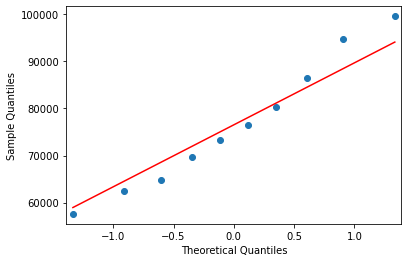

In [27]:
qqplot(n_d['Income'], line='s') # applying qqplot on 'Income'
plt.show() 

 
 ####  For quantile vs quantile plot we need to understand that if our data is fitted on the straight line then our data is normally                         distributed  
 ####   but here our all the data is not  lied on the straight line so i would say that data is not normally distributed.  
 

### Statistical approach 

####   in statistic approach if we want know that if our null hypothesis is valid or not then we can know by 
####   the help of "p-value"-- probability value.   
####   if our p value is <= 0.05 then we should imply that it rejects our null hypothesis 
####   and if p > 0.05 that means our data is normaly distributed.

In [28]:
n_d_numeric = n_d.iloc[:,1:3] # here i have fetched the numeric columns from data because we do not want categorical data
n_d_numeric               

,Age,Income
0,49.000000,86400.000000
1,32.000000,57600.000000
2,35.000000,64800.000000
3,43.000000,73200.000000
4,45.000000,76533.333333
5,40.000000,69600.000000
6,43.777778,62400.000000
7,53.000000,94800.000000
8,55.000000,99600.000000
9,42.000000,80400.000000


In [ ]:
# 1: shapiro - wilk test -- it is one of the method that has been spacially desined to check the normality of the numeric data.

In [30]:
from scipy.stats import shapiro #importing the shapiro method

stat , p = shapiro(n_d_numeric) #passing the columns
print('Statistics=%.3f, p=%.3f' % (stat, p))
 
if p > 0.05 : # checking for null hypothesis
    print('Data is normally distributed , Supports the null hypothesis ')
else:
    print('Data is not normally distributed , does not supports null hypothesis')

Statistics=0.768, p=0.000
Data is not normally distributed , does not supports null hypothesis


In [32]:
# 2 : Anderson - darling test  -- rather than just simply returning p value anderson- darling test will return critical values.
                                 # critical values is pre-defined measurement that will help in analyzing weather to reject null hypothesis or .not 
 
from scipy.stats import anderson # importing pre-defined anderson function

and_dar = anderson(n_d['Age'])    # initiating anderson function for 'Age'
print('Statistic: %.3f' % and_dar.statistic) 
p = 0 
for i in range(len(and_dar.critical_values)): 
    s_l, c_v = and_dar.significance_level[i], and_dar.critical_values[i]  # s_l -- significant level # c_v -- critical value
    if and_dar.statistic < and_dar.critical_values[i]:
         print('%.3f: %.3f, data looks normal ( does not reject the null hypothesis)' % (s_l, c_v))
    else:
        print('%.3f: %.3f, data does not look normal (reject the null hypothesis)' % (s_l, c_v))    

Statistic: 0.179
15.000: 0.501, data looks normal ( does not reject the null hypothesis)
10.000: 0.570, data looks normal ( does not reject the null hypothesis)
5.000: 0.684, data looks normal ( does not reject the null hypothesis)
2.500: 0.798, data looks normal ( does not reject the null hypothesis)
1.000: 0.950, data looks normal ( does not reject the null hypothesis)


In [33]:
from scipy.stats import anderson 

and_dar = anderson(n_d['Income'])    # initiating anderson function for 'Income'
print('Statistic: %.3f' % and_dar.statistic) 
p = 0 
for i in range(len(and_dar.critical_values)):
    s_l, c_v = and_dar.significance_level[i], and_dar.critical_values[i]
    if and_dar.statistic < and_dar.critical_values[i]:
         print('%.3f: %.3f, data looks normal ( do not reject the null hypothesis)' % (s_l, c_v))
    else:
        print('%.3f: %.3f, data does not look normal (reject the null hypothesis)' % (s_l, c_v))    

Statistic: 0.177
15.000: 0.501, data looks normal ( do not reject the null hypothesis)
10.000: 0.570, data looks normal ( do not reject the null hypothesis)
5.000: 0.684, data looks normal ( do not reject the null hypothesis)
2.500: 0.798, data looks normal ( do not reject the null hypothesis)
1.000: 0.950, data looks normal ( do not reject the null hypothesis)


### Label Encoding and Scaling of Categorical Variable

In [38]:
 # here in our dataset we have two categorical columns
 # for converting hem into numeric type we can use Label Encoder 
# by below's code execution we can see that Both column has two type of variable that's why we can use the Binary encoder like label encoder.

In [35]:
 n_d['Region'] ,  n_d['Online Shopper']

(0     India
 1    Brazil
 2       USA
 3    Brazil
 4       USA
 5     India
 6    Brazil
 7     India
 8       USA
 9     India
 Name: Region, dtype: object,
 0     No
 1    Yes
 2     No
 3     No
 4    Yes
 5    Yes
 6     No
 7    Yes
 8     No
 9    Yes
 Name: Online Shopper, dtype: object)

In [36]:
from sklearn.preprocessing import LabelEncoder #importing the label Encoder
label_encoder = LabelEncoder() # creating the instance

In [37]:
label_encoder.fit(n_d['Region'])  
n_d['Region'] = label_encoder.transform(n_d['Region']) #transforming to numeric type
n_d

,Region,Age,Income,Online Shopper
0,1,49.000000,86400.000000,No
1,0,32.000000,57600.000000,Yes
2,2,35.000000,64800.000000,No
3,0,43.000000,73200.000000,No
4,2,45.000000,76533.333333,Yes
5,1,40.000000,69600.000000,Yes
6,0,43.777778,62400.000000,No
7,1,53.000000,94800.000000,Yes
8,2,55.000000,99600.000000,No
9,1,42.000000,80400.000000,Yes


In [39]:
label_encoder.fit(n_d['Online Shopper'])
n_d['Online Shopper'] = label_encoder.transform(n_d['Online Shopper'])
n_d

,Region,Age,Income,Online Shopper
0,1,49.000000,86400.000000,0
1,0,32.000000,57600.000000,1
2,2,35.000000,64800.000000,0
3,0,43.000000,73200.000000,0
4,2,45.000000,76533.333333,1
5,1,40.000000,69600.000000,1
6,0,43.777778,62400.000000,0
7,1,53.000000,94800.000000,1
8,2,55.000000,99600.000000,0
9,1,42.000000,80400.000000,1


#### Feature Scaling 

Feature Scaling is the one of the important steps of data-preprocessing. it is a method which brings all the data in given dataset on same scale.

There are various kind of feature scaling method available but here i have used the normalization method.

in normalize scaling it scales the data in range of 0 to 1.

In [40]:
# For normalization scaling we need to import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mxscaler = MinMaxScaler()   # assigning the MinMaxScaler method to it's object.
scaling = n_d.iloc[:, :-1] 
scaling = mxscaler.fit_transform(scaling) 
scaling

array([[0.5       , 0.73913043, 0.68571429],
       [0.        , 0.        , 0.        ],
       [1.        , 0.13043478, 0.17142857],
       [0.        , 0.47826087, 0.37142857],
       [1.        , 0.56521739, 0.45079365],
       [0.5       , 0.34782609, 0.28571429],
       [0.        , 0.51207729, 0.11428571],
       [0.5       , 0.91304348, 0.88571429],
       [1.        , 1.        , 1.        ],
       [0.5       , 0.43478261, 0.54285714]])

#### Question -- 2 

In [41]:
# For cleaning the text data , natural language processing(NLP) is the best technique.
# there are various steps involved in perofrming NLP, and tokenization is one of them. there are various steps availabel
# to perform tokenization but here we are going to use NLTK libarary.

# Now, tokenization is the method of splitting the given phrases, sentances, or even whole text document in to it's smaller units like words or terms.
# each of the word or terms after split can be recognized as "Token".

In [42]:
import nltk
import string

In [44]:
# before we tokenize the text we need to clean the text for that below i have implimented various technique.
# readning the file
w_text = open('C:/Users/Raj Patel/Documents/college/ml programming/wiki.txt')

wiki_text = w_text.read()

In [45]:
wiki_text

'The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.\n\nThe Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would be a solved problem.[2] However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. Little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.\n\nSome notably successful NLP systems developed in the 1960s were SHRDLU, a natural-language system working in restricted "blocks wo

In [46]:
# here we don't have any heading or title text so we can convert our paragraph into lower alphabet.
wiki_text.lower() 

'the history of nlp generally started in the 1950s, although work can be found from earlier periods. in 1950, alan turing published an article titled "computing machinery and intelligence" which proposed what is now called the turing test as a criterion of intelligence.\n\nthe georgetown experiment in 1954 involved fully automatic translation of more than sixty russian sentences into english. the authors claimed that within three or five years, machine translation would be a solved problem.[2] however, real progress was much slower, and after the alpac report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.\n\nsome notably successful nlp systems developed in the 1960s were shrdlu, a natural-language system working in restricted "blocks wo


  Now for removing the punctuations from the text there are many methods available.
  
  here i have used  "maketranslate" and "translate" method.
  
  syntex: maketranslate('','',# here we will provide the text from which we want to remove punctuation)
  first two arguments we will pass empty strings.
  
  now we will use translate() and pass the instance in which we performed the maketanslate() method.
    


In [47]:
remove = string.punctuation

translator = str.maketrans('','',remove)
wiki_text = wiki_text.translate(translator)   

In [48]:
wiki_text

'The history of NLP generally started in the 1950s although work can be found from earlier periods In 1950 Alan Turing published an article titled Computing Machinery and Intelligence which proposed what is now called the Turing test as a criterion of intelligence\n\nThe Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English The authors claimed that within three or five years machine translation would be a solved problem2 However real progress was much slower and after the ALPAC report in 1966 which found that tenyearlong research had failed to fulfill the expectations funding for machine translation was dramatically reduced Little further research in machine translation was conducted until the late 1980s when the first statistical machine translation systems were developed\n\nSome notably successful NLP systems developed in the 1960s were SHRDLU a naturallanguage system working in restricted blocks worlds with restricted vo

#### we can see that all the punctuatios has been gone from the paragraph

In [49]:
  # now removing the stopwords from the text 
  # stop words are those words in text that occurs many time in text but do not contribute to the actual meaning of sentences when we creating model.
  # for example: have, had, is , am 

In [50]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Raj
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [122]:
from nltk.corpus import stopwords
print(stopwords.words('english'))
#below printed all are predefined stopwords.

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [123]:
s_w = set(stopwords.words('english')) 
wiki_text = " ".join([word for word in str(wiki_text).split() if word not in s_w]) 

In [124]:
wiki_text #stop words removed.

'The history NLP generally started 1950s although work found earlier periods In 1950 Alan Turing published article titled Computing Machinery Intelligence proposed called Turing test criterion intelligence The Georgetown experiment 1954 involved fully automatic translation sixty Russian sentences English The authors claimed within three five years machine translation would solved problem2 However real progress much slower ALPAC report 1966 found tenyearlong research failed fulfill expectations funding machine translation dramatically reduced Little research machine translation conducted late 1980s first statistical machine translation systems developed Some notably successful NLP systems developed 1960s SHRDLU naturallanguage system working restricted blocks worlds restricted vocabularies ELIZA simulation Rogerian psychotherapist written Joseph Weizenbaum 1964 1966 Using almost information human thought emotion ELIZA sometimes provided startlingly humanlike interaction When patient exc

In [51]:
from nltk import word_tokenize 

# here i have used word_tokenize() to convert sentences into token or words.

word_tokenize(wiki_text)

['The',
 'history',
 'of',
 'NLP',
 'generally',
 'started',
 'in',
 'the',
 '1950s',
 'although',
 'work',
 'can',
 'be',
 'found',
 'from',
 'earlier',
 'periods',
 'In',
 '1950',
 'Alan',
 'Turing',
 'published',
 'an',
 'article',
 'titled',
 'Computing',
 'Machinery',
 'and',
 'Intelligence',
 'which',
 'proposed',
 'what',
 'is',
 'now',
 'called',
 'the',
 'Turing',
 'test',
 'as',
 'a',
 'criterion',
 'of',
 'intelligence',
 'The',
 'Georgetown',
 'experiment',
 'in',
 '1954',
 'involved',
 'fully',
 'automatic',
 'translation',
 'of',
 'more',
 'than',
 'sixty',
 'Russian',
 'sentences',
 'into',
 'English',
 'The',
 'authors',
 'claimed',
 'that',
 'within',
 'three',
 'or',
 'five',
 'years',
 'machine',
 'translation',
 'would',
 'be',
 'a',
 'solved',
 'problem2',
 'However',
 'real',
 'progress',
 'was',
 'much',
 'slower',
 'and',
 'after',
 'the',
 'ALPAC',
 'report',
 'in',
 '1966',
 'which',
 'found',
 'that',
 'tenyearlong',
 'research',
 'had',
 'failed',
 'to',
 'f

In [52]:
len(word_tokenize(wiki_text))

212

In [53]:
# in regexp_tokenize -- it tokenize the sentence or paragraph by matching the pattern of regularexpression.

In [54]:
from nltk import RegexpTokenizer #importing from nltk

regexp_token = RegexpTokenizer('\s+', gaps=True)  #here i have provided the reguler expression. 
                                                  # "\s+" will matches space and comma from sentences.
regexp_token = regexp_token.tokenize(wiki_text)

In [55]:
regexp_token

['The',
 'history',
 'of',
 'NLP',
 'generally',
 'started',
 'in',
 'the',
 '1950s',
 'although',
 'work',
 'can',
 'be',
 'found',
 'from',
 'earlier',
 'periods',
 'In',
 '1950',
 'Alan',
 'Turing',
 'published',
 'an',
 'article',
 'titled',
 'Computing',
 'Machinery',
 'and',
 'Intelligence',
 'which',
 'proposed',
 'what',
 'is',
 'now',
 'called',
 'the',
 'Turing',
 'test',
 'as',
 'a',
 'criterion',
 'of',
 'intelligence',
 'The',
 'Georgetown',
 'experiment',
 'in',
 '1954',
 'involved',
 'fully',
 'automatic',
 'translation',
 'of',
 'more',
 'than',
 'sixty',
 'Russian',
 'sentences',
 'into',
 'English',
 'The',
 'authors',
 'claimed',
 'that',
 'within',
 'three',
 'or',
 'five',
 'years',
 'machine',
 'translation',
 'would',
 'be',
 'a',
 'solved',
 'problem2',
 'However',
 'real',
 'progress',
 'was',
 'much',
 'slower',
 'and',
 'after',
 'the',
 'ALPAC',
 'report',
 'in',
 '1966',
 'which',
 'found',
 'that',
 'tenyearlong',
 'research',
 'had',
 'failed',
 'to',
 'f

In [56]:
len(regexp_token)

212

 #### Now we will define regular expression for extracting years that appears in text.

In [57]:
# for importing regular expression we need python "re" module.
# here we want find all occurance of the date from our text.so i have used .findall() method.

In [58]:
import re 
find_year = re.findall('(\d{4})', wiki_text) # here reg.exp. is "\d{4}" which matches the pattern which contains the four digits.that would be our year in this text.
find_year

['1950', '1950', '1954', '1966', '1980', '1960', '1964', '1966']

 ###### Observation:  here tokenize the text by two different methods, we can observe that there is no difference in output of those two                                                            method. we can also see that by checking the length of two output.



#### Task -- 3



In [59]:
mlb_house = pd.read_csv('C:/Users/Raj Patel/Documents/college/ml programming/melb_data.csv') 

In [60]:
mlb_house

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [61]:
mlb_house.isnull().sum() # there are four columns which contains null value. 

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [62]:
# here i have find the mean of the column beacause i want to replace the null value by it.
mean_car = mlb_house['Car'].mean()
mean_car

1.6100754549489569

In [63]:
mlb_house['Car'].fillna(value = mean_car , inplace = True)   #replacing the value by mean

In [65]:
mlb_house['Car'].isnull().sum()  # missing value has been dealt with

0

In [66]:
mean_BuildingArea = mlb_house['BuildingArea'].mean() 
mean_BuildingArea 

151.96764988779805

In [67]:
mlb_house['BuildingArea'].fillna(value = mean_BuildingArea, inplace = True)

In [68]:
mlb_house['BuildingArea'].isnull().sum()

0

In [69]:
mlb_house['YearBuilt'].fillna(mlb_house['YearBuilt'].value_counts().index[0], inplace = True)
# year's mean would give us float value and it's not appropriate so i replaced null value by it's first index's value

In [70]:
mlb_house['YearBuilt'].isnull().sum()

0

In [71]:
mlb_house['CouncilArea'].fillna(mlb_house['CouncilArea'].value_counts().index[0], inplace = True)
#same for the Council Area

In [72]:
mlb_house['CouncilArea'].isnull().sum()

0

In [73]:
mlb_house.isnull().sum() #all the null value has been dealt with

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [74]:
mlb_house.drop_duplicates(inplace = True) 

In [75]:
mlb_house.shape # we had no duplicate values in our dataset

(13580, 21)

In [76]:
# corr() is predefined function which gives us the correlation between numeric datatypes. 
# if correlation is nearer to 1 or more than 0.5 we call it high positive correlation , and same can be said for negative correlation.
mlb_house.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.407843,0.025678,0.091373,-0.051562,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238637,0.037507,0.069570,-0.259387,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262074,0.025004,0.073990,0.194815,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050201,0.024558,0.040714,0.025400,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.404721,0.025646,0.089102,-0.041331,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.321788,0.037130,0.084462,0.113957,-0.070594,0.118971,-0.052201
Car,0.407843,0.238637,0.262074,0.050201,0.404721,0.321788,1.000000,0.026759,0.068389,0.080473,-0.001961,0.063304,-0.024255
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026759,1.000000,0.094659,0.008806,0.009695,0.010833,-0.006854
BuildingArea,0.091373,0.069570,0.073990,0.040714,0.089102,0.084462,0.068389,0.094659,1.000000,0.005178,0.031799,-0.017441,-0.020736
YearBuilt,-0.051562,-0.259387,0.194815,0.025400,-0.041331,0.113957,0.080473,0.008806,0.005178,1.000000,0.046718,-0.000515,0.004421


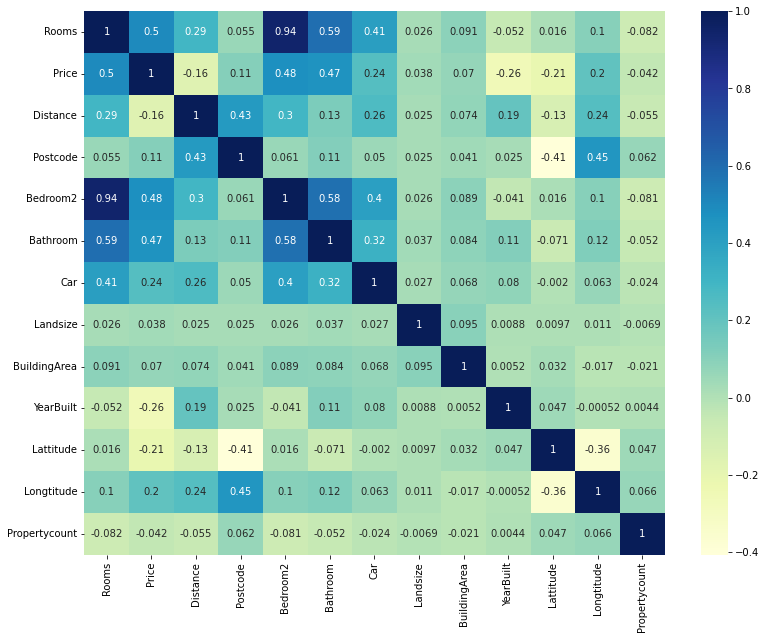

In [77]:
plt.figure(figsize=(13, 10))
sns.heatmap(mlb_house.corr(),cmap = "YlGnBu", annot= True)
plt.show()

In [79]:
 # here we can see that "bedroom2" and 'rooms' are highly positive correlated with each other so we can just any one of them.

In [78]:
clean_data = mlb_house.copy() 
mlb_h = clean_data.drop(['Bedroom2'], axis = 1) 

mlb_h

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.0,151.96765,1970.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.00000,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.00000,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,2.0,1.0,94.0,151.96765,1970.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,1.0,2.0,120.0,142.00000,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,2.0,2.0,652.0,151.96765,1981.0,Moreland,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,2.0,2.0,333.0,133.00000,1995.0,Moreland,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,2.0,4.0,436.0,151.96765,1997.0,Moreland,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,1.0,5.0,866.0,157.00000,1920.0,Moreland,-37.85908,144.89299,Western Metropolitan,6380.0


In [29]:
# now for performing feature selection i am separating our target column which is "price" and rest of the numeric columns.

In [79]:
test = mlb_h['Price']   # separating the target column

In [80]:
test

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 13580, dtype: float64

In [81]:
mlb_h_numeric = pd.DataFrame(clean_data , columns=['Rooms','Distance','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','Propertycount'])
# here from copy of data that we have created earlier we assigned all the numeric value to the mlb_h_numeric instance 

In [82]:
mlb_h_numeric 

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1970.0,-37.79960,144.99840,4019.0
1,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.0,-37.80790,144.99340,4019.0
2,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.0,-37.80930,144.99440,4019.0
3,3,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1970.0,-37.79690,144.99690,4019.0
4,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,16.7,3150.0,4.0,2.0,2.0,652.0,151.96765,1981.0,-37.90562,145.16761,7392.0
13576,3,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.0,-37.85927,144.87904,6380.0
13577,3,6.8,3016.0,3.0,2.0,4.0,436.0,151.96765,1997.0,-37.85274,144.88738,6380.0
13578,4,6.8,3016.0,4.0,1.0,5.0,866.0,157.00000,1920.0,-37.85908,144.89299,6380.0


In [83]:
# i have agian used the scaling method here because 
# in Lattitude column we had negative values and we won't be able to perform task.
train = sklearn.preprocessing.MinMaxScaler().fit_transform(mlb_h_numeric) 

In [84]:
train = pd.DataFrame(train, columns=['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount'])

In [86]:
# after performing the scaling we can see the all the data are between o and 1.
train

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,0.111111,0.051975,0.068577,0.10,0.125,0.1,0.000466,0.003414,0.941606,0.494755,0.517651,0.176160
1,0.111111,0.051975,0.068577,0.10,0.125,0.0,0.000360,0.001775,0.856448,0.484031,0.513083,0.176160
2,0.222222,0.051975,0.068577,0.15,0.250,0.0,0.000309,0.003370,0.856448,0.482223,0.513997,0.176160
3,0.222222,0.051975,0.068577,0.15,0.250,0.1,0.000217,0.003414,0.941606,0.498243,0.516281,0.176160
4,0.333333,0.051975,0.068577,0.15,0.125,0.2,0.000277,0.003190,0.995134,0.484936,0.513723,0.176160
...,...,...,...,...,...,...,...,...,...,...,...,...
13575,0.333333,0.347193,0.153531,0.20,0.250,0.2,0.001506,0.003414,0.954988,0.357781,0.672246,0.333769
13576,0.222222,0.141372,0.016377,0.15,0.250,0.2,0.000769,0.002988,0.972019,0.417664,0.408601,0.286482
13577,0.222222,0.141372,0.016377,0.15,0.250,0.4,0.001007,0.003414,0.974453,0.426100,0.416221,0.286482
13578,0.333333,0.141372,0.016377,0.20,0.125,0.5,0.002000,0.003527,0.880779,0.417909,0.421346,0.286482


In [87]:
from scipy import stats 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFpr, chi2, SelectKBest, SelectFwe, f_classif, SelectFdr  
 
import matplotlib.pyplot as plt
%matplotlib inline  

#### chi-square

In [89]:
# for selecting best feature from our dataset 
# here using the chi square method.
feat_slc = SelectKBest(score_func=chi2, k=5) 
new_data = feat_slc.fit_transform(train, test)
 
mask = feat_slc.get_support()
best_features = train.columns[mask]
best_features 

Index(['Rooms', 'Distance', 'Postcode', 'Bathroom', 'Propertycount'], dtype='object')

In [ ]:
# if we want to determine which method would perform best on our dataset we have to make model and finding out 
# it's mean absolute error, mean squared error and root mean squared error 
# we can also know performance by r-square method but here i have not implemented that.

In [91]:
train_new = train[best_features]  # here we only ise the best features for predicting the model cause those are the most relevent our data. 

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_new, test, test_size=0.4, random_state=7) #spliting the dataset into 60-40 part

In [93]:
# making linear regression model
from sklearn.linear_model import LinearRegression
l_regression = LinearRegression( n_jobs=5 ) 
l_regression.fit(X_train, y_train)

LinearRegression(n_jobs=5)

In [95]:
prediction = l_regression.predict(X_test) #predicting the model

In [96]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 327346.50667362066
Mean Squared Error: 225352935042.14502
Root Mean Squared Error: 474713.52944923006


In [107]:
# importing mutual inforamtion regression  
from sklearn.feature_selection import mutual_info_regression


In [108]:
# selecting the best features 
f_s = SelectKBest(score_func=mutual_info_regression, k=5)
# learning relation from the training data
f_s.fit(train, test)
X_fs = f_s.transform(train)

In [110]:
feat_importances_mi = pd.DataFrame(f_s.scores_, index = train.columns, columns=["Importance"])

feat_importances_mi
# here we can see the the importance of the all the columns to our data

,Importance
Rooms,0.219545
Distance,0.206130
Postcode,0.318777
Bedroom2,0.201728
Bathroom,0.126692
Car,0.100321
Landsize,0.143117
BuildingArea,0.204167
YearBuilt,0.081543
Lattitude,0.147455


Feature 0: 0.219545
Feature 1: 0.206130
Feature 2: 0.318777
Feature 3: 0.201728
Feature 4: 0.126692
Feature 5: 0.100321
Feature 6: 0.143117
Feature 7: 0.204167
Feature 8: 0.081543
Feature 9: 0.147455
Feature 10: 0.153926
Feature 11: 0.205127


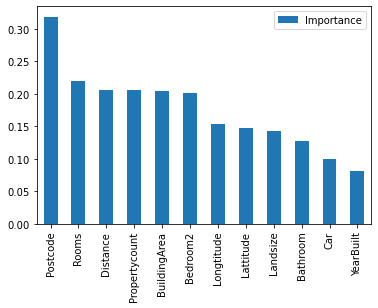

In [117]:
feat_importances_mi.sort_values(by='Importance', ascending=False, inplace=True) #sorting the columns by there importance
feat_importances_mi.plot(kind='bar')
for i in range(len(f_s.scores_)):   #printing out columns 
    print('Feature %d: %f' % (i, f_s.scores_[i]))

In [112]:
train_mi = train[feat_importances_mi.index[:5]] #again selecting the first five best characters

In [113]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.4, random_state=7) #spliting the dataset into two parts.

In [114]:
l_regression.fit(X_train,y_train) 

LinearRegression(n_jobs=5)

In [115]:
prediction = l_regression.predict(X_test)

In [116]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 296910.19401262846
Mean Squared Error: 272395450273.69476
Root Mean Squared Error: 521915.1753625246


<AxesSubplot:>

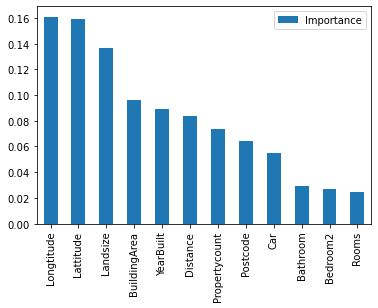

In [118]:
# Rndom forest feature importance
from sklearn.ensemble import RandomForestClassifier

r_f_c = RandomForestClassifier(n_estimators=10) # random forest classifier 

r_f_c = r_f_c.fit(train,test) #fitting the model
important_feat = pd.DataFrame(r_f_c.feature_importances_, index=train.columns, columns=["Importance"]) #fetching the important feature
important_feat.sort_values(by='Importance', ascending=False, inplace=True) 
important_feat.plot(kind='bar')

In [102]:
 new_train = train[important_feat.index[:5]] # selecting the first five most important features.

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_train, test, test_size=0.4, random_state=7)

In [104]:
l_regression.fit(X_train,y_train)    #here by training the dataset that we gained by doing random forest feature importance

LinearRegression(n_jobs=5)

In [105]:
prediction = l_regression.predict(X_test)

In [106]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 396319.37021851784
Mean Squared Error: 973264698169.2808
Root Mean Squared Error: 986541.7873406482


  here i have implimented linearregression model on all three feature selection method.
  
#####  1) chi square test :
mean Absolute Error: 327346.50667362066

Mean Squared Error: 225352935042.14502

Root Mean Squared Error: 474713.52944923006

#####  2) mutual information method
Mean Absolute Error: 296910.19401262846

Mean Squared Error: 272395450273.69476

Root Mean Squared Error: 521915.1753625246

 #####  3) random forest feature selection:
Mean Absolute Error: 396319.37021851784

Mean Squared Error: 973264698169.2808

Root Mean Squared Error: 986541.7873406482

  

 we can see that chi square method is the best feature selection method for given dataset
 
 whereas Radom forest feature selection is the worst method for given dataset.